# Linear modelling: Road distance and map distance

## Summary

### Data

Road, `float` :
road distance between two locations in Sheffield

Map, `float` :
map distance (ie, straight line) between two locations in Sheffield

### Method

- Data modelled using simple linear regression through the origin
- Data, model, and prediction intervals plotted
- Assumptions of the distribution of the residuals checked with a 
  residual plot, normal probability plot, and hypothesis test
  $H_{0} : \beta = 0$

### Summary results

```python
results{'beta': 1.289, 'tstat_beta': 42.803, 'pval_beta': 0.000, "dof": 11}
```

### Output

<!--Add path to FinishingM248-->

### Reference

m248.c.act5

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# change wkdir and import the data
os.chdir("..\\")
data = pd.read_csv("data\\distance.csv")

### Preview and describe the data

In [4]:
data.head()

,Road,Map
0,10.7,9.5
1,11.7,9.8
2,6.5,5.0
3,25.6,19.0
4,29.4,23.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Road,20.0,20.855,9.611094,6.5,13.575,19.05,28.850,40.5
Map,20.0,16.130,7.337151,4.8,11.000,14.90,21.775,28.2


### Model the data

In [6]:
X = data["Map"]
y = data["Road"]

In [7]:
model = sm.OLS(y, X).fit()
model.params

Map    1.289072
dtype: float64

### Visualise the model

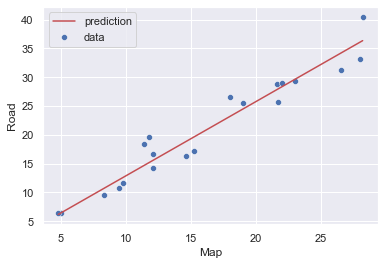

In [8]:
# plot data and model
f, ax = plt.subplots()
sns.scatterplot(x=X, y=y, label="data")
sns.lineplot(x=X, y=model.predict(), color="r", label="prediction")
os.chdir("figures")
plt.savefig("distance_fig1")
os.chdir("..")
plt.show()

### Check assumptions of residual values

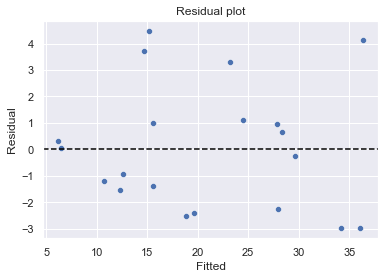

In [9]:
# residual plot
f, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=model.resid, ax=ax)
ax.set(xlabel="Fitted", ylabel="Residual", title="Residual plot")
ax.axhline(y=0, color="black", linestyle="--")
os.chdir("figures")
plt.savefig("distance_fig2")
os.chdir("..")
plt.show()

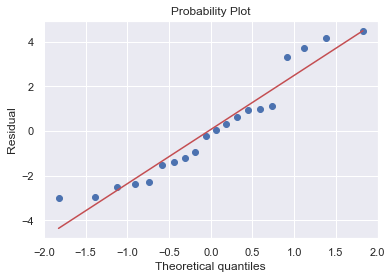

In [10]:
# probability plot
f, ax = plt.subplots()
stats.probplot(x=model.resid, plot=ax)
ax.set(ylabel="Residual")
os.chdir("figures")
plt.savefig("distance_fig3")
os.chdir("..")
plt.show()

#### Hypothesis test: $H_{0} : \beta = 0$

In [11]:
tstat, pval = model.tvalues[0], model.pvalues[0]

In [12]:
tstat, pval

(42.803044497295, 2.325153186257358e-20)